In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import torch
from torchvision.datasets import CelebA
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
T = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,), inplace=True)
])

def denormalize(img):
    return img.mul(0.5).add(0.5).mul(255).add(0.5).clamp(0, 255).to('cpu', torch.uint8)

from utils import plot_tensors

In [7]:
d = CelebA('../_datasets/', 'train', 'attr', transform=T, download=False)

In [8]:
loader = torch.utils.data.DataLoader(d, batch_size=10000, shuffle=True, num_workers=1, prefetch_factor=1)

# from utils import dataloader_one_batch
# X, y = dataloader_one_batch(loader)

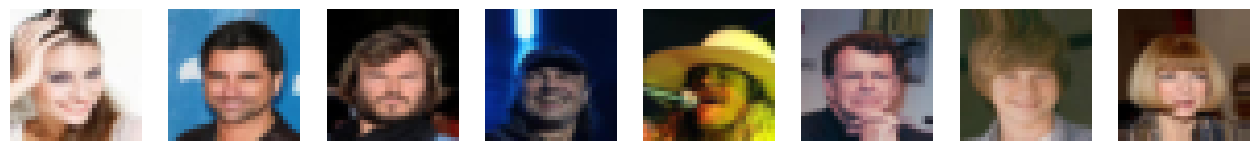

In [21]:
X, _ = next(iter(loader))
plot_tensors((X[:8]), 1, 8, 'rgb')

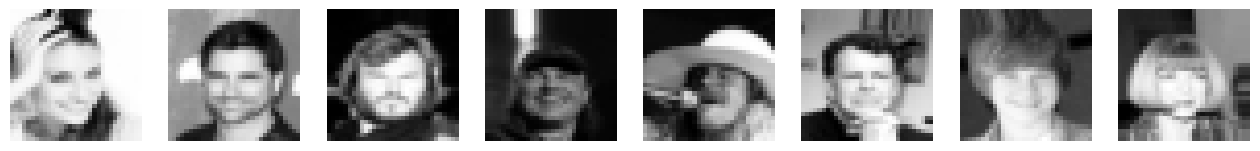

In [19]:
def rgb_to_grayscale_normalized(image_tensor):
    grayscale = 0.2989 * image_tensor[:, 0, :, :] + 0.5870 * image_tensor[:, 1, :, :] + 0.1140 * image_tensor[:, 2, :, :]
    
    grayscale_normalized = (grayscale - 0.5) / 0.5
    
    return grayscale_normalized.unsqueeze(1)


# 将 RGB 张量转换为归一化的灰度图像张量
grayscale_normalized_tensor = rgb_to_grayscale_normalized(X)

# 打印结果张量的形状
plot_tensors((1+grayscale_normalized_tensor[:8])/2, 1, 8, 'grey')

In [20]:
torch.save(grayscale_normalized_tensor, './data/test_data')

In [16]:
grayscale_normalized_tensor.min()

tensor(-1.)

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)


sigmas = torch.arange(0, 32, 2)/10
for i in range(len(sigmas)):
    X_ = X + sigmas[i] * torch.randn_like(X)
    pca.fit(X_.view(-1, 3*64*64))
    U = pca.components_
    




(10, 1000)
(12288, 1000)


(array([ 3.,  1.,  4.,  9., 15., 13., 29., 39., 50., 54., 62., 73., 75.,
        54., 71., 67., 50., 44., 43., 37., 35., 33., 41., 25., 31.,  5.,
        16., 12.,  1.,  4.,  2.,  2.]),
 array([-3.71275244, -3.65007773, -3.58740302, -3.52472831, -3.4620536 ,
        -3.39937889, -3.33670418, -3.27402947, -3.21135476, -3.14868005,
        -3.08600534, -3.02333063, -2.96065592, -2.89798121, -2.8353065 ,
        -2.77263179, -2.70995708, -2.64728237, -2.58460766, -2.52193295,
        -2.45925824, -2.39658353, -2.33390882, -2.27123411, -2.2085594 ,
        -2.14588469, -2.08320998, -2.02053527, -1.95786056, -1.89518585,
        -1.83251114, -1.76983643, -1.70716172]),
 <BarContainer object of 32 artists>)

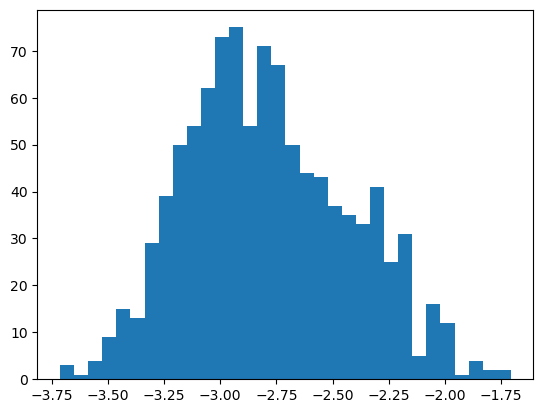

In [137]:
n = 1000
z = np.dot(U, X_[:n].view(3*64*64, n)).squeeze()
print(z.shape)
x_ = (U.T.dot(z)).reshape((-1, 3, 64, 64))
print(U.T.dot(z).shape)
plt.hist(z[3], bins=32)
# x_ = torch.tensor(x_)
# plot_tensors(denormalize(x_[:n]), 1, 2, 'rgb')


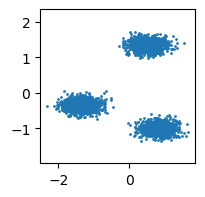

In [157]:
mu_1 = torch.tensor([-2, -2.5])
mu_2 = torch.tensor([1.4, 4])
mu_3 = torch.tensor([2, -5])

sigma_1 = sigma_2 = sigma_3 = 0.5

x_1 = mu_1 + sigma_1 * torch.randn(1000, 2)
x_2 = mu_2 + sigma_2 * torch.randn(1000, 2)
x_3 = mu_3 + sigma_3 * torch.randn(1000, 2)

X = torch.cat((x_1, x_2, x_3), dim=0)
X = X - X.mean(dim=0)
X = X / X.std(dim=0)

figure = plt.figure(figsize=(2,2), dpi=100)
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.axis('equal')
plt.show()

(-1.1287987984504457,
 1.1166321804223744,
 -0.07044138722185368,
 0.07030770822425539)

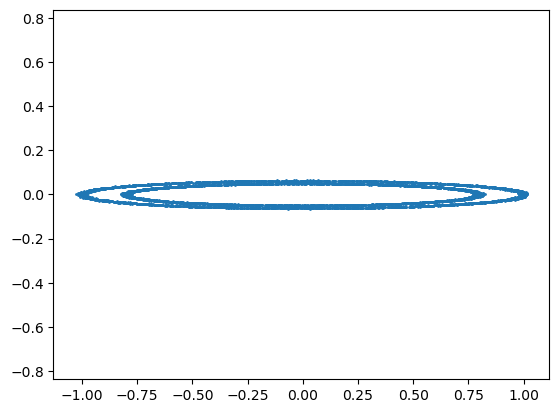

In [17]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=5000, shuffle=True, noise=0.01, random_state=None, factor=0.8)
X[:, 1] /= 16
X = torch.tensor(X)
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.axis('equal')


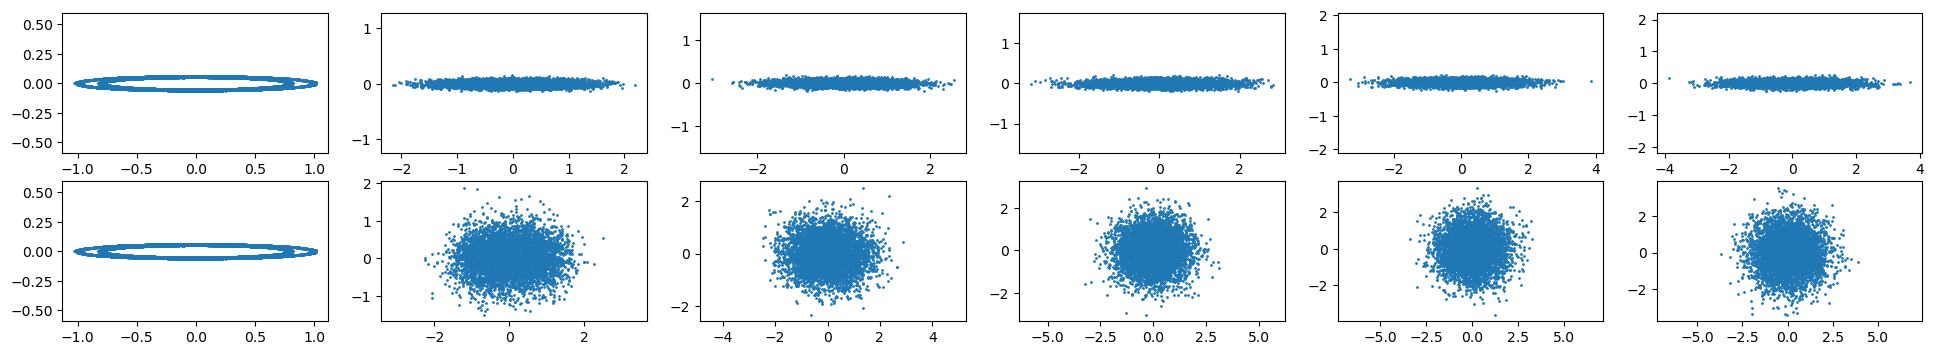

In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.neighbors import KernelDensity
T = 5
sigmas = torch.arange(0, T+1, 1)/T
x_lim = y_lim = 2

fig, axs = plt.subplots(2, T+1, figsize=(4*(T+1), 4))
for i in range(T+1):
    u = sigmas[i]/(16 ** 2)
    s = torch.tensor([sigmas[i], u])
    # s = sigmas[i]
    X_ = np.sqrt(1 - s) * X + np.sqrt(s) * torch.randn_like(X)
    axs[0][i].scatter(X_[:, 0], X_[:, 1], s=1)
    axs[0][i].axis('equal')
    # axs[0][i].set_xlim(-3, 3)
    # axs[0][i].set_xticks([])
    # axs[0][i].set_yticks([])

# fig, axs = plt.subplots(1, T+1, figsize=(4*(T+1), 4))
for i in range(T+1):
    s = torch.tensor([sigmas[i], sigmas[i]])
    # s = sigmas[i]
    X_ = np.sqrt(1 - s) * X + np.sqrt(s) * torch.randn_like(X)
    axs[1][i].scatter(X_[:, 0], X_[:, 1], s=1)
    
    axs[1][i].axis('equal')
    
    # axs[1][i].set_xticks([])
    # axs[1][i].set_yticks([])


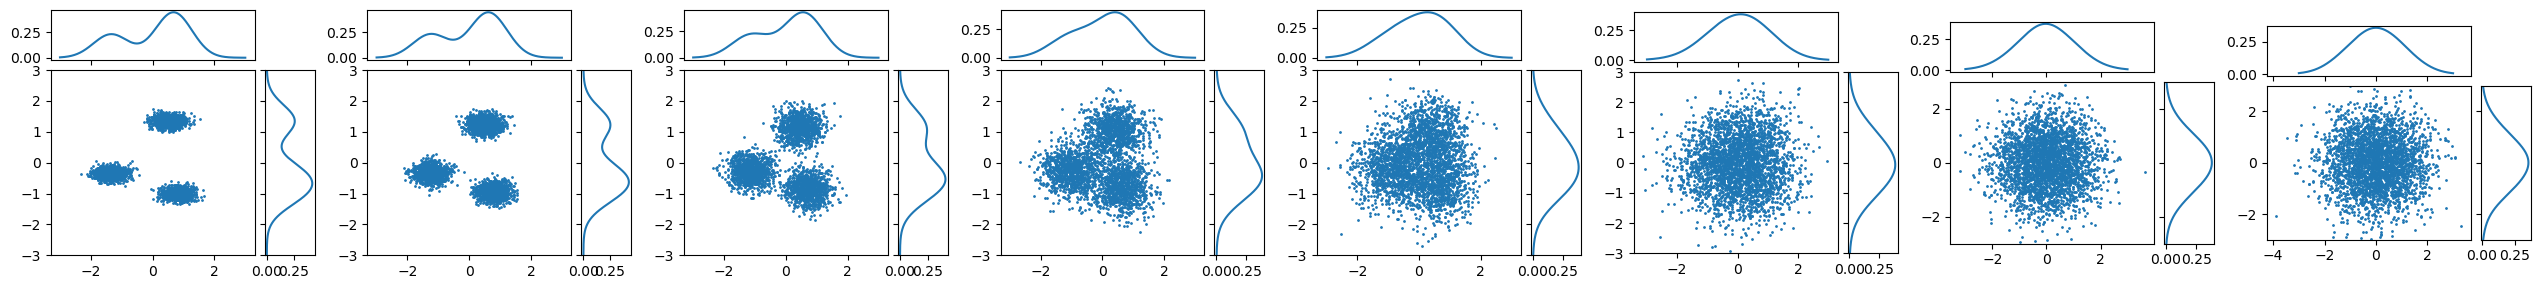

In [158]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.neighbors import KernelDensity

T = 7
fig, axs = plt.subplots(1, T+1, figsize=(4*(T+1), 4))
x_lim = y_lim = 3

sigmas = torch.arange(0, T+1, 1)/T
for i in range(T+1):
    X_ = np.sqrt(1 - sigmas[i]) * X + sigmas[i] * torch.randn_like(X)
    axs[i].scatter(X_[:, 0], X_[:, 1], s=1)
    axs[i].axis('equal')

    divider = make_axes_locatable(axs[i])
    ax_histx = divider.append_axes("top", 0.5, pad=0.1, sharex=axs[i])
    ax_histy = divider.append_axes("right", 0.5, pad=0.1, sharey=axs[i])
    ax_histx.xaxis.set_tick_params(labelbottom=False)
    ax_histy.yaxis.set_tick_params(labelleft=False)

    x = X_[:, 0][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(x)
    X_plot = np.linspace(-x_lim, x_lim, 1000)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    ax_histx.plot(X_plot[:, 0], np.exp(log_dens))

    x = X_[:, 1][:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(x)
    X_plot = np.linspace(-x_lim, x_lim, 1000)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    ax_histy.plot(np.exp(log_dens), X_plot[:, 0])

    # ax_histx.set_ylim(-x_lim, x_lim)
    ax_histy.set_ylim(-x_lim, x_lim)

# fig, axs = plt.subplots(1, 5, figsize=(24, 4))
# for i in range(5):
#     X_[:, 1] = X[:, 1]
#     X_[:, 0] = np.sqrt(1 - sigmas[i]) * X[:, 0] + sigmas[i] * torch.randn_like(X_[:, 0])
#     axs[i].scatter(X_[:, 0], X_[:, 1], s=1)
#     axs[i].axis('equal')

#     divider = make_axes_locatable(axs[i])
#     ax_histx = divider.append_axes("top", 0.5, pad=0.1, sharex=axs[i])
#     ax_histy = divider.append_axes("right", 0.5, pad=0.1, sharey=axs[i])
#     ax_histx.xaxis.set_tick_params(labelbottom=False)
#     ax_histy.yaxis.set_tick_params(labelleft=False)

#     x = X_[:, 0][:, np.newaxis]
#     kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(x)
#     X_plot = np.linspace(-x_lim, x_lim, 1000)[:, np.newaxis]
#     log_dens = kde.score_samples(X_plot)
#     ax_histx.plot(X_plot[:, 0], np.exp(log_dens))

#     x = X_[:, 1][:, np.newaxis]
#     kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(x)
#     X_plot = np.linspace(-x_lim, x_lim, 1000)[:, np.newaxis]
#     log_dens = kde.score_samples(X_plot)
#     ax_histy.plot(np.exp(log_dens), X_plot[:, 0])


In [111]:
X.numpy().dot(np.array([[np.cos(45), -np.sin(45)], [np.sin(45), np.cos(45)]]))

array([[-2.79686153,  1.87839154],
       [-2.91099661,  1.76828412],
       [-2.77823054,  1.72399893],
       ...,
       [ 2.03763808, -4.41986974],
       [ 2.17825659, -4.51139048],
       [ 2.20311976, -4.52911097]])

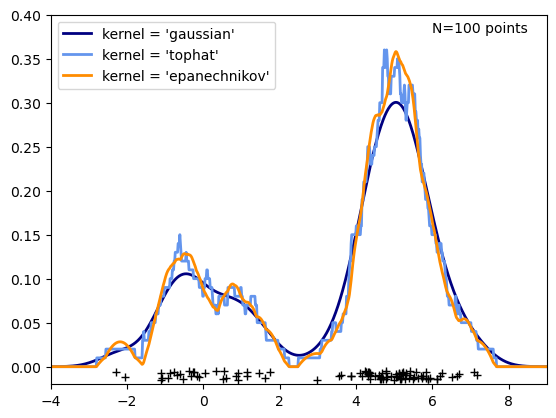

In [40]:
X.shape

(100, 1)